<a href="https://colab.research.google.com/github/ubsuny/g2coral-CP2P2024/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Connecting to google drie to import data (optional)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cv2
import time
import timeit
import csv

In [47]:
def import_images(file_path, rows=480, columns=640):
  """" Function to import images from a .npy file and reshape
  them to 2D nparrays with the specified dimensions. """
  data = np.load(file_path)

  images=[]
  for k in range(len(data)):
    images.append(data[k].reshape((rows,columns)))

  return images

In [4]:
def which_algorithm(image, template):

  """
  This function is meant to help the user determine which algorithm to use for template matching.
  It helps the user in choosing an algorithm that will detect the object accuratley.
  Furthermore, it compares the execution time of each algorithm.

  """

  #Height and Width of Template
  h, w = template.shape

  methods = [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED, cv2.TM_CCORR,cv2.TM_CCORR_NORMED,
            cv2.TM_CCOEFF,cv2.TM_CCOEFF_NORMED]
  method_label = ["cv2.TM_SQDIFF", "cv2.TM_SQDIFF_NORMED", "cv2.TM_CCORR","cv2.TM_CCORR_NORMED",
            "cv2.TM_CCOEFF","cv2.TM_CCOEFF_NORMED"]

  execution_times = []

  # Iterate over each method and measure the execution time
  for method, label in zip(methods, method_label):
      img2 = image.copy()

      # Start the timer
      start_time = time.time()

      # Perform template matching
      result = cv2.matchTemplate(img2, template, method)
      min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
      if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
          location = min_loc
      else:
          location = max_loc

      # End the timer
      end_time = time.time()
      execution_time = end_time - start_time
      execution_times.append(1000*execution_time)

      # Draw a rectangle around object
      bottom_right = (location[0] + w, location[1] + h)
      cv2.rectangle(img2, location, bottom_right, 255, 5)

      # Convert BGR to RGB for matplotlib
      img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)


      # Plotting
      plt.imshow(img2_rgb)
      plt.title('Match using method: {}, Execution Time: {:.2f} ms'.format(label, execution_time*1000))
      plt.axis('off')
      plt.show()

  # Plotting Execution Time
  plt.figure(figsize=(10, 6))
  plt.bar(method_label, execution_times, color='skyblue')
  plt.xlabel('Template Matching Methods')
  plt.ylabel('Execution Time (ms)')
  plt.title('Execution Time Comparison of Template Matching Methods')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

In [45]:
def template_matching(images, template, method = cv2.TM_CCORR):

  # Height and Width of Template
  h, w = template.shape

  location_list = []

  for i in range(len(images)):
    img2 = images[i].copy()

    result = cv2.matchTemplate(img2, template, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
      location = min_loc
    else:
      location = max_loc

    location_list.append(location)

  return location_list

def plot_locations(location_list, arrow_size=1):
  # Unpacking the list of tuples into separate lists for x and y coordinates
  x = [point[0] for point in location_list]
  y = [point[1] for point in location_list]

  # Create a list of arrow directions
  dx = np.diff(x)
  dy = np.diff(y)

  # Plot the quiver plot
  plt.figure(figsize=(8, 6))
  plt.quiver(x[:-1], y[:-1], dx, dy, scale=arrow_size, scale_units='xy', angles='xy')

  # Set plot limits
  plt.xlim(min(x) - 0.1, max(x) + 0.1)
  plt.ylim(min(y) - 0.1, max(y) + 0.1)

  # Add grid for better visualization
  plt.grid(True)

  # Show plot
  plt.show()


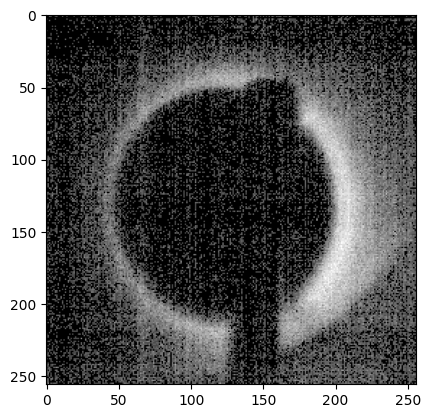

In [49]:
images = import_images('/content/drive/MyDrive/data_1.npy',256,256)
plt.imshow(images[0],cmap='gray')

180 180


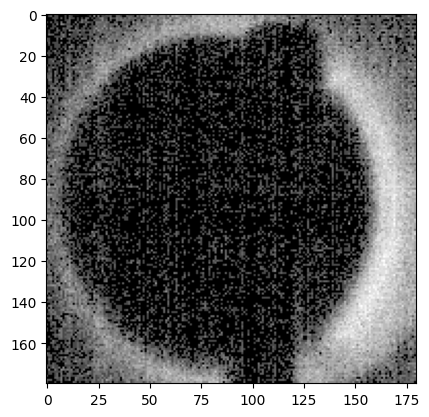

In [50]:
template = np.load('/content/drive/MyDrive/live_temp.npy')
h, w = template.shape
print(h,w)
plt.imshow(template,cmap='gray')

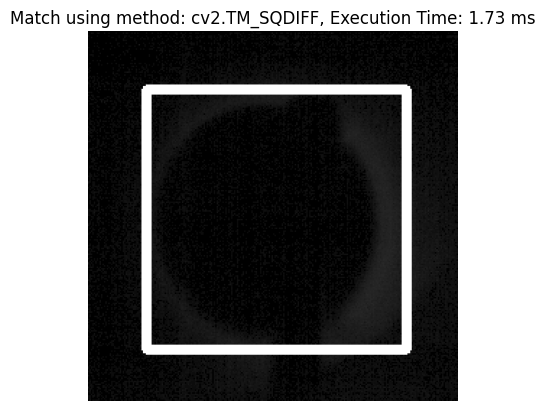

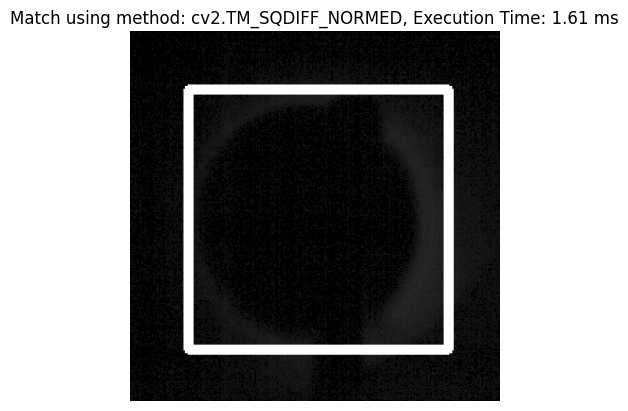

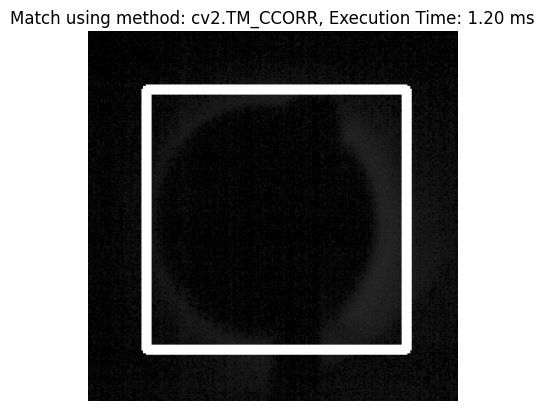

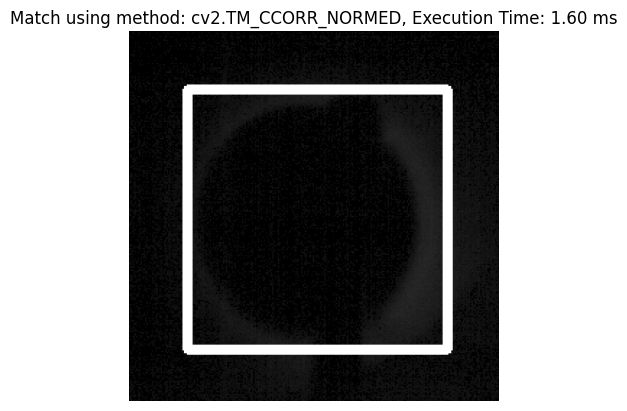

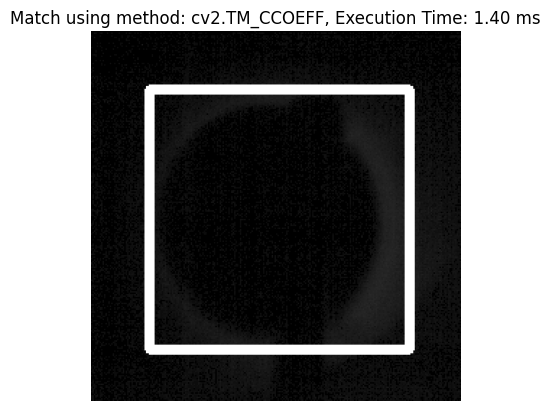

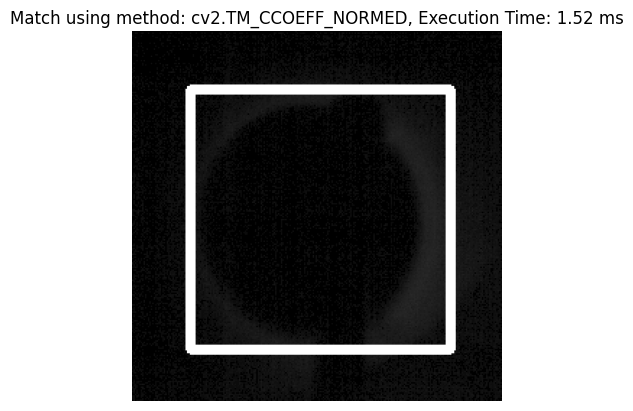

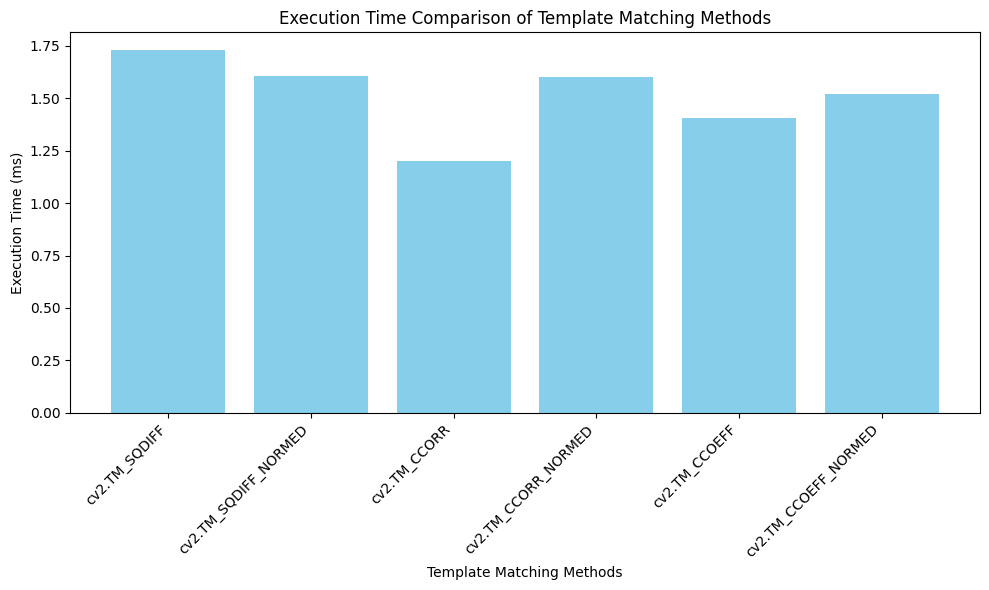

In [54]:
which_algorithm(images[0],template)

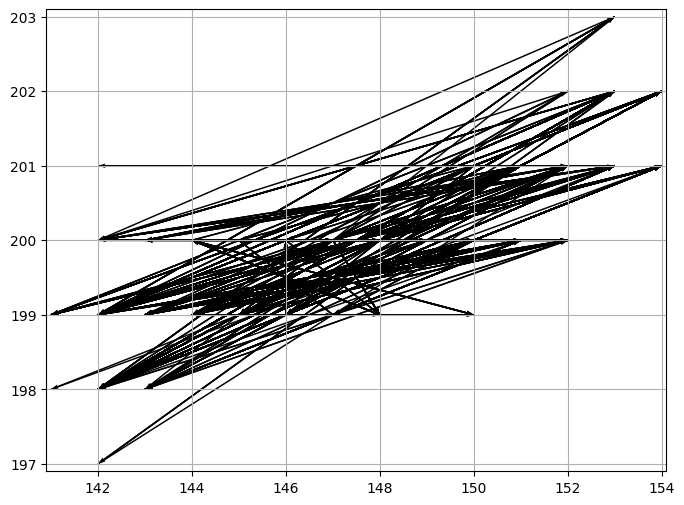

In [46]:
location_list = template_matching(images,template)
plot_locations(location_list,1)

# References
[1] T. Ruscica, “techwithtim/OpenCV-Tutorials,” GitHub, May 08, 2024. https://github.com/techwithtim/OpenCV-Tutorials (accessed May 11, 2024).
‌

[2] “OpenCV: Object Detection,” docs.opencv.org. https://docs.opencv.org/4.x/df/dfb/group__imgproc__object.html#ga586ebfb0a7fb604b35a23d85391329be (accessed May 11, 2024)
‌

[3] OpenAI, “ChatGPT,” chat.openai.com, 2024. https://chat.openai.com/ (accessed May 11, 2024)
‌